### Структура типичной нейронной сети Кохонена показана ниже: (во входном слое - 5 нейронов)

#### 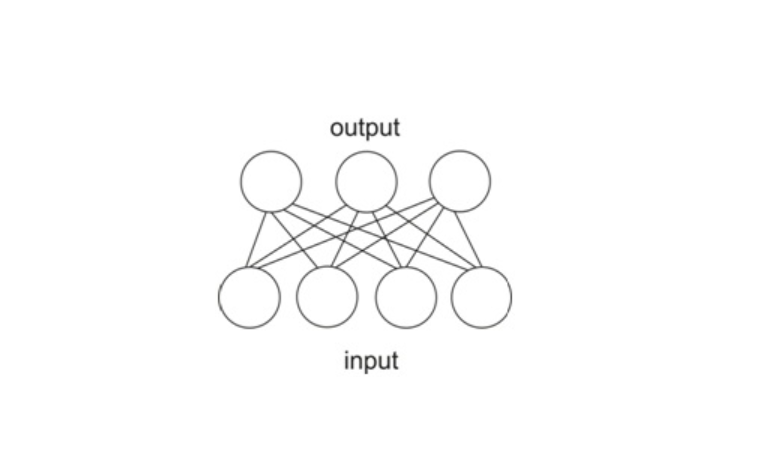


#### Импорт библиотек 

In [1]:
import  numpy  as   np 
import  pandas  as  pd

#### Затем мы загружаем набор данных 

In [2]:
path = "C:/test/Data.xlsx" # путь к файлу с данными
xl = pd.ExcelFile(path)
dataset = pd.read_excel(xl, 'Данные') # читаем данные с нужного листа
dataset.head(7) # проверяем , правильно ли считалось 

,Naimen,X13,X20,X27,X29,X36,Class
0,Абдулинский,30.0,6844,25.0,26,742.3,3
1,Адамовский,16.5,8102,69.6,33,6450.3,2
2,Акбулакский,21.9,6897,37.8,42,5640.7,3
3,Александровский,27.0,7933,94.2,38,3487.7,2
4,Асекеевский,20.9,6601,37.3,40,2877.2,3
5,Беляевский,23.7,7600,57.0,29,3994.3,3
6,Бугурусланский,19.2,8359,32.2,33,1970.9,3


#### Нормализуем данные 

In [3]:
def normilize(df):
    features = df.columns[1:-1] #список признаков
    new_dict = {} #будущий датафрем с нормализованными данными
    for feature in features:
        vars()["list" + str(feature)] = [] #создание списка для каж
        for element in df[feature]:
            element = (element-min(df[feature]))/(max(df[feature])-min(df[feature])) #нормализация каждого столбца(признака)
            vars()["list" + str(feature)].append(element)
        new_dict[feature] = vars()["list" + str(feature)]
    return pd.DataFrame(new_dict)

            
    

In [4]:
normilize_data = normilize(dataset) #нормализованные данные
normilize_data.head()


,X13,X20,X27,X29,X36
0,0.399408,0.050835,0.000000,0.407407,0.002821
1,0.000000,0.153815,0.594667,0.537037,0.034772
2,0.159763,0.055174,0.170667,0.703704,0.030240
3,0.310651,0.139980,0.922667,0.629630,0.018189
4,0.130178,0.030943,0.164000,0.666667,0.014771


In [5]:
list_X13=[]
list_X20=[]
list_X27=[]
list_X29=[]
list_X36=[]
for x_13 in dataset['X13']:
    x_13 = (x_13-min(dataset['X13']))/(max(dataset['X13'])-min(dataset['X13']))
    list_X13.append(x_13)
for x_20 in dataset['X20']:
    x_20 = (x_13-min(dataset['X20']))/(max(dataset['X20'])-min(dataset['X20']))
    list_X20.append(x_20)
for x_27 in dataset['X27']:
    x_27 = (x_27-min(dataset['X27']))/(max(dataset['X27'])-min(dataset['X27']))
    list_X27.append(x_27)
for x_29 in dataset['X29']:
    x_29 = (x_29-min(dataset['X29']))/(max(dataset['X29'])-min(dataset['X29']))
    list_X29.append(x_29)
for x_36 in dataset['X36']:
    x_36 = (x_36-min(dataset['X36']))/(max(dataset['X36'])-min(dataset['X36']))
    list_X36.append(x_36)

X = np.array(list(zip(list_X13,list_X20, list_X27, list_X29, list_X36)))

####  Затем мы инициируем число классов или кластеров, список для векторов w , количество векторов x и размерность векторов x 

In [6]:
nc  =  3 # количество классов 
W  =  [] # список для w векторов 
M  =  len(X)      # количество x векторов 
N  =  len (X[0])   # размерность x векторов
print(M)
print(N)

46
5


#### Затем мы создаем функцию для получения случайных значений для x- векторов (или весов) и затем инициализируем эти x- векторы

In [7]:
def  get_weights (M): 
    y  =  np.random.random ()  * ( 2.0  /  np .sqrt(M)) 
    return   0.5  - ( 1  /  np.sqrt(M))  +  y
# задаем веса в диапазоне от 0 до 1 

In [8]:
get_weights(M) 

0.38920357012699536

#### Для каждого кластера задаются веса по количеству элементов кластера

In [9]:
for i in range(nc):
    W.append(list())
    for j in range(N):
        W[i].append(get_weights(M) * 0.5)


#### Мы создаем функцию для вычисления евклидова расстояния между нашими векторами x и w :

In [10]:
def distance(w, x):
    r = 0
    for i in range(len(w)):
        r = r + (w[i] - x[i]) * (w[i] - x[i]) #сумма квадратов расстояний
    r = np.sqrt(r)
    return r

#### Мы создаем функцию для нахождения ближайших x- векторов к w- векторам:

In [11]:
'''Векторы входных сигналов  x обрабатываются по одному, для каждого из них находится ближайший вектор «победитель»'''
def Findclosest(W, x):
    r = None #расстояние
    wm = None #нейрон победитель
    i_n = None #номер нейрона победителя
    for i in range(len(W)):
        if (r == None) or (distance(W[i], x) < r): 
            r = distance(W[i], x)
            wm = W[i]
            i_n = i
    return (wm, i_n)

In [12]:
print(W) #веса 

[[0.2688982529135708, 0.19171189756167972, 0.27948920821356155, 0.21719900628379918, 0.24082667625842225], [0.1780920986283358, 0.21632454856992428, 0.1999896213852806, 0.1776651404825781, 0.2727546293512873], [0.2383053638068814, 0.3212377791998994, 0.2216050101877871, 0.26803406622722603, 0.27924007153007774]]


#### Затем мы инициализируем коэффициенты alfa(t) и h(t) и начинаем цикл, чтобы найти ближайшие x- векторы к w- векторам:

In [13]:
import math
def alfa(t):
    al = 0.3
    lb = 0.5
    e = math.exp(-t/lb)
    return al*e

In [14]:
def h(t,n_i,i,W):
    T1 = 10
    delta0 = 0.7
    d = distance(W[i],W[n_i])
    delta = delta0/(1 + t/T1)
    hdt = 0
    if d <= delta:
        hdt = math.exp(-(d*d)/(2*delta*delta))
    return alfa(t)*hdt

In [15]:
la = 0.3    # λ coefficient

while la >= 0.003:
    for k in range(10):
        for x in X:
            wm = Findclosest(W, x)[0]
            i_n = Findclosest(W, x)[1]
            for j in range(len(W)):
                for i in range(len(W[j])):
                    W[j][i] = W[j][i] + alfa(k) * h(k,i_n,j,W) * (x[i] - W[j][i])
        la = alfa(k)

#### Итак, сейчас наша сеть обучена. Наконец, мы можем сравнить результаты нашей классификации с фактическими значениями из фрейма данных:

In [16]:
Data = list() 

for i in range(len(W)):
    Data.append(list())

dfList = dataset['Class'].as_matrix() 
print(dfList)

[3 2 3 2 3 3 3 3 3 2 3 2 2 2 3 3 2 1 3 2 1 3 2 3 2 3 2 3 3 3 3 2 2 3 2 1 1
 1 1 1 1 1 1 1 1 1]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [17]:
DS = list()
i = 0
for x in X:
    i_n = Findclosest(W, x)[1]
    Data[i_n].append(x)
    DS.append([i_n, dfList[i]])
    i = i + 1

print (DS)

result = {'Name': [], 'Kohonen':[], 'K-Means' :[]}

for i in range(len(dataset)):
    result['Name'].append(dataset['Naimen'][i])
    result['Kohonen'].append(DS[i][0])
    result['K-Means'].append(DS[i][1])

pd.DataFrame(result)
res = pd.DataFrame(result)

writer = pd.ExcelWriter("output.xlsx",engine = 'xlsxwriter')
res.to_excel(writer, sheet_name = 'Result_Kohonen')
writer.save()


[[1, 3], [1, 2], [1, 3], [2, 2], [1, 3], [1, 3], [1, 3], [2, 3], [1, 3], [1, 2], [1, 3], [1, 2], [1, 2], [2, 2], [2, 3], [1, 3], [1, 2], [1, 1], [2, 3], [2, 2], [2, 1], [2, 3], [2, 2], [1, 3], [1, 2], [2, 3], [1, 2], [1, 3], [1, 3], [1, 3], [2, 3], [1, 2], [1, 2], [2, 3], [1, 2], [0, 1], [0, 1], [0, 1], [0, 1], [1, 1], [1, 1], [0, 1], [2, 1], [0, 1], [0, 1], [0, 1]]


#### Мы видим, что класс «2» полностью перекрывается с классом « Irissetosa », класс «1» в основном перекрывается с классом « Iris-versicolor », а класс «0» в основном перекрывается с « Iris-virginica ». Между классами « Iris-virginica » и « Iris-versicolor » существует 18 несоответствий , что соответствует 12% всего набора данных. Итак, общее соответствие наших результатов фактическим данным составляет 88%.

#### Поскольку мы инициализировали классы «0», «1», «2» случайным образом, порядок этих классов может быть другим на других итерациях этой программы, но это не меняет структуру классификации.